In [1]:
# Import Dependencies

import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
# Create a set of random latitude and longitute combinations:

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to show the lat and long combinations

for coordinate in coordinates:
    print(coordinate[0],coordinate[1])
    

87.55438920349107 167.14553450028546
-72.13582421059077 141.00459342039528
80.25088197028586 -170.62156202446994
5.733386832011391 -52.62621823424571
2.218389032143506 78.96624737357581
37.218664942893724 -88.37321533591907
-43.51636646484352 15.708643215670662
-30.413409222014614 -102.70252809720209
-69.76029484654501 -110.68144357991423
-16.7132566424324 -91.11621812170654
40.44999278810394 122.85079986879003
-36.97319292066521 94.34871775665795
48.81689323473461 -14.964284999018986
85.51086605342292 -15.22294108590657
51.720614091625976 -2.1801786052500916
-16.443317651055906 31.823107814679275
-73.3438477118987 -11.828593741075906
54.14842376913998 168.0433614841225
54.894421565715845 -51.58262095563674
8.522530017288119 154.62971809348556
-20.14489469311421 157.33018412046079
-17.830331348035116 -95.28504315253844
-83.63420850866669 125.21522832011794
-67.46502904487156 -162.89739064036485
22.42022576776688 41.261869052029425
38.96527963582099 -2.065200595920942
52.04101435932711 

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []
# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

614

In [7]:
# Import the requests library:

import requests

# Import the API key
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Import the time library and datetima module

import time
from datetime import datetime

In [8]:
# Create an empty lsit to hold the weather data:

city_data = []

# Print the beginning of the logging:

print("Beginning Data Retrieval    ")
print("-------------")

# create counters:

record_count = 1
set_count = 1

# loop through cities in the list:

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i % 50 == 0 and i >= 50):
        set_count+= 1
        record_count =1 
        time.sleep(60)
        
    # Create endpoint URL with each city:
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1

    
# Run an API request for each of the cities:

    try:
        # Parse the JSON and retrieve DATA:
        city_weather = requests.get(city_url).json()
        # parse out the needed DATA:
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date for ISO standard:

        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d- %H:%M;%S')

        # Append the city information into the city_data list:

        city_data.append({"City": city.title(),
                         "Lat" : city_lat,
                         "lng" : city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error occurs, skip the city:
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data loading is complete:

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
-------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | sinnamary
Processing Record 5 of Set 1 | weligama
Processing Record 6 of Set 1 | paducah
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | huarmey
Processing Record 11 of Set 1 | yingkou
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | dingle
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | stroud
Processing Record 16 of Set 1 | mount darwin
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | poum
Processing Record 22 of Set 1 | puerto ay

Processing Record 36 of Set 4 | kamyshevatskaya
Processing Record 37 of Set 4 | yanam
Processing Record 38 of Set 4 | borba
Processing Record 39 of Set 4 | anadyr
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | maarianhamina
Processing Record 42 of Set 4 | griffith
Processing Record 43 of Set 4 | arlit
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | placido de castro
Processing Record 46 of Set 4 | escanaba
Processing Record 47 of Set 4 | padilla
Processing Record 48 of Set 4 | maple valley
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | norman wells
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | agirish
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | nome
Processing Record 6 of Set 5 | mahibadhoo
Processing Record 7 of Set 5 | corrente
Processing Record 8 of Set 5 | camopi
Processing Record 9 of Set 5 | rabat
Processing Record 

Processing Record 25 of Set 8 | keetmanshoop
Processing Record 26 of Set 8 | prince rupert
Processing Record 27 of Set 8 | aden
Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | kurilsk
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | salacgriva
Processing Record 32 of Set 8 | dukat
Processing Record 33 of Set 8 | kropotkin
Processing Record 34 of Set 8 | gorontalo
Processing Record 35 of Set 8 | conde
Processing Record 36 of Set 8 | sobolevo
Processing Record 37 of Set 8 | chifeng
Processing Record 38 of Set 8 | gobabis
Processing Record 39 of Set 8 | mayo
Processing Record 40 of Set 8 | carnot
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | kampot
Processing Record 43 of Set 8 | fallon
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | dese
Processing Record 46 of Set 8 | pasni
Processing Record 47 of Set 8 | dinsor
City not found. Skipping...
Processing Record 48 of Set 8 | richards bay
Process

Processing Record 11 of Set 12 | bathsheba
Processing Record 12 of Set 12 | jinotega
Processing Record 13 of Set 12 | krasnogorodsk
Processing Record 14 of Set 12 | maiduguri
Processing Record 15 of Set 12 | aksarka
Processing Record 16 of Set 12 | ust-kan
Processing Record 17 of Set 12 | henniker
Processing Record 18 of Set 12 | izhma
Processing Record 19 of Set 12 | turiacu
Processing Record 20 of Set 12 | itatiaia
Processing Record 21 of Set 12 | svetlogorsk
Processing Record 22 of Set 12 | westport
Processing Record 23 of Set 12 | sioux lookout
Processing Record 24 of Set 12 | tautira
Processing Record 25 of Set 12 | wakkanai
Processing Record 26 of Set 12 | mana
Processing Record 27 of Set 12 | terrace
Processing Record 28 of Set 12 | abdanan
Processing Record 29 of Set 12 | cacimbinhas
Processing Record 30 of Set 12 | ponnani
Processing Record 31 of Set 12 | show low
Processing Record 32 of Set 12 | sinkat
City not found. Skipping...
Processing Record 33 of Set 12 | nantucket
Pro

In [9]:
len(city_data)

560

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,32.47,97,100,12.66,RU,2022-07-19- 23:01;57
1,Hobart,-42.8794,147.3294,40.05,86,20,10.36,AU,2022-07-19- 22:55;31
2,Sinnamary,5.3833,-52.9500,77.68,84,91,10.02,GF,2022-07-19- 23:01;57
3,Weligama,5.9667,80.4167,77.54,89,93,11.83,LK,2022-07-19- 23:01;58
4,Paducah,37.0834,-88.6001,91.11,70,40,5.75,US,2022-07-19- 22:59;16
5,Hermanus,-34.4187,19.2345,51.75,77,21,3.53,ZA,2022-07-19- 23:01;58
6,Lebu,-37.6167,-73.6500,47.95,79,31,1.43,CL,2022-07-19- 22:58;31
7,Punta Arenas,-53.1500,-70.9167,39.11,69,78,36.17,CL,2022-07-19- 23:00;57
8,Huarmey,-10.0681,-78.1522,64.22,80,68,9.57,PE,2022-07-19- 23:01;59
9,Yingkou,40.6648,122.2283,74.39,84,100,7.58,CN,2022-07-19- 23:00;19


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-07-19- 23:01;57,69.7008,170.3133,32.47,97,100,12.66
1,Hobart,AU,2022-07-19- 22:55;31,-42.8794,147.3294,40.05,86,20,10.36
2,Sinnamary,GF,2022-07-19- 23:01;57,5.3833,-52.9500,77.68,84,91,10.02
3,Weligama,LK,2022-07-19- 23:01;58,5.9667,80.4167,77.54,89,93,11.83
4,Paducah,US,2022-07-19- 22:59;16,37.0834,-88.6001,91.11,70,40,5.75
5,Hermanus,ZA,2022-07-19- 23:01;58,-34.4187,19.2345,51.75,77,21,3.53
6,Lebu,CL,2022-07-19- 22:58;31,-37.6167,-73.6500,47.95,79,31,1.43
7,Punta Arenas,CL,2022-07-19- 23:00;57,-53.1500,-70.9167,39.11,69,78,36.17
8,Huarmey,PE,2022-07-19- 23:01;59,-10.0681,-78.1522,64.22,80,68,9.57
9,Yingkou,CN,2022-07-19- 23:00;19,40.6648,122.2283,74.39,84,100,7.58


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Get relevant fields from the DF for plotting purposes:

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



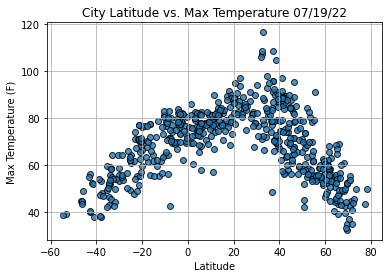

In [14]:
# Import time module

import time
import matplotlib.pyplot as plt

# Scatter Plot building:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Other graph properties:

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph:

plt.savefig("weather_data/Fig1.png")

# Show plot:

plt.show()

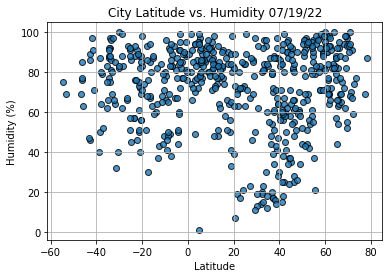

In [15]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

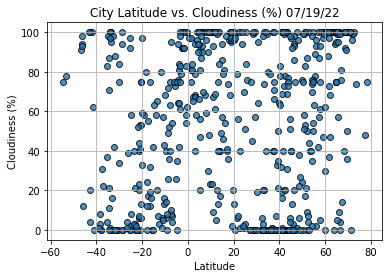

In [16]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

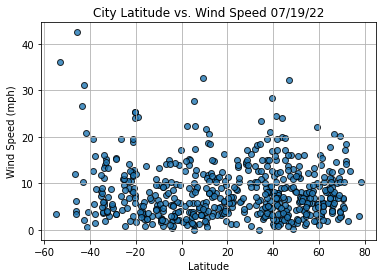

In [17]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()